# Анализ игровых платформ

На основе исторических данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах до 2016 года необходимо выявить определяющие успешность игры закономерности и определить потенциально прибыльные платформы на 2017 год.

### Шаг 1. Открытие файла с данными и изучение общей информации

Для начала импортируем все библиотеки, потребующиеся в данной работе.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

Далее прочитаем файл с данными и изучим общую информацию.

In [2]:
path = 'datasets/games.csv'                                     # Путь к файлу на локальком компьютере
path_net = 'is_hidden'                                          # Путь к файлу в интернете
try:
    games = pd.read_csv(path)                                   # Пробуем прочитать локальный файл
except:
    games = pd.read_csv(path_net)                               # Если не получилось - читаем из интернета
games.info()                                                    # Получаем основную информацию о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
games.isna().sum().sort_values(ascending=False) / len(games)    # Определяем долю отсутствующих значений в столбцах

Critic_Score       0.513192
Rating             0.404786
User_Score         0.400897
Year_of_Release    0.016093
Genre              0.000120
Name               0.000120
Other_sales        0.000000
JP_sales           0.000000
EU_sales           0.000000
NA_sales           0.000000
Platform           0.000000
dtype: float64

Есть несколько пропущенных значений в столбцах Name и Genre, больше пропущенных значений в столбце Year_of_Release, много пропущенных значений в столбцах User_Score, Rating и Critic_Score.

In [4]:
games.head(10)  # Выводим несколько строк файла

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Возможно изменить тип данных столбца Year_of_Release на int, а столбца User_Score на float. Также для удобства следует привести названия столбцов к нижнему регистру.

### Выводы

Исходные данные изучены. Есть довольно много пропущенных значений, которые необходиму изучить. Возможно заменить тип данных в одном столбце на целочисленный. Также можно привести названия столбцов к нижнему регистру.

### Шаг 2. Предобработка данных

Для дальнейшего анализа необходимо подготовить данные.

Сначала приведем названия столбцов к нижнему регистру

In [5]:
column_names = games.columns.values.tolist()                 # Получаем список из названий столбцов
column_names = [item.lower() for item in column_names]       # Приводим список к нижнему регистру
games.set_axis(column_names, axis=1, inplace=True)           # Заменяем названия столбцов на сформированный список
games.head()                                                 # Выводим несколько строк таблицы

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Далее поменяем тип столбца year_of_release на целочисленный, так как год является целым числом. Тип столбца user_score меняем на вещественный, так как он содержит данные об оценке пользователей.

In [6]:
try:
    games['year_of_release'] = games['year_of_release'].astype('Int64')             # Пробуем преобразовать тип данных в Int64
except:
    games['year_of_release'] = games['year_of_release'].round().astype('Int64')     # Если не получилось - сначала округляем значения
    

games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.9       2
1.1       2
2.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Привести столбец user_score к нужному типу сразу не удалось, так как некоторые ячейки сожержат аббревеатуру tbd, что обычно расшифровывается как to be determined, то есть "будет определено". На практике это означает, что оценка еще не выставлена, или недстаточно данных для формирования средней оценки. Проще говоря, в нашем случае это означает аналог пропуска данных в этом столбце. Поэтому заменим эту аббревеатуру на пропуск, что бы данный столбец содержал только вещественные данные.

In [7]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'] = pd.to_numeric(games['user_score'])
games.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Теперь займемся пропусками.<br>
Больше всего пропусков в столбце critic_score. Очевидно, что не каждую игру оценивают критики. Заменять отсутствующее значение на какое-либо другое не имеет смысла, так как это исказит общую картину по всем играм. То же самое относится и к столбцу user_score, пропуски в котором говорят о том, что либо недостаточно пользователей оценили игру, либо оценки нет вовсе.<br>


In [8]:
games['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Среди всех значений ретинга следует выделить несколько: K-A - это рейтинг, который в 1998 был заменен на E, а значит его можно также заменить и в наших данных; RP - означает, что рейтинг еще не присвоен, что фактически говорит об отсутствии рейтинга. Так как игр с рейтингом RP всего три, а отсутствующих значений в данном столбце около 40%, можем заменить все отсутствующие значения на аббревеатуру RP, в дальнейшем подразумевая, что рейтинг у игры отсутствует.

In [9]:
games['rating'] = games['rating'].replace('K-A', 'E') # Меняем устаревший рейтинг на современный
games['rating'] = games['rating'].fillna('RP')        # Пропуски заполняем рейтингом RP
games['rating'].value_counts()

RP      6769
E       3993
T       2961
M       1563
E10+    1420
EC         8
AO         1
Name: rating, dtype: int64

Далее рассмотрим пропуски в столбце year_of_release. Есть много способов, как обработать такие пропуски. Самый очевидный - подгрузить эти данные из интернета. Но для этого необходимо либо разбираться с api конкретного сайта, либо как-то обработать результаты метода read_html(). Однако, наша работа подразумевает, что мы работаем с теми данными, что есть, а значит нужен другой способ обработки пропусков. Так как в этом столбце всего 1,6% пропусков, не возникнет большого искажения данных, если для конкретной игры указать год выпуска такой же, как и год выпуска этой игры на другой платформе, если такие данные имеются. Если же таких данных нет для другой платформы, то такие пропуски оставим незаполненными.

In [10]:
def year_search(row):                           # Опишем функцию, заменяющую отсутствующие значения года
    if row.isna()['year_of_release']:           # Проверим, отсутствует ли год у игры
        name = row['name']                      # Сохраним название игры
        year = games.loc[games['name'] == name, 'year_of_release'].max()  # Найдем игру на другой платформе, возьмем наибольший год
    else:
        year = row['year_of_release']  # Если год указан - оставим без изменений
    return year

games['year_of_release'] = games.apply(year_search, axis=1) # Применим функцию к датасету

Осталось обработать пропуски в колонках name и genre. Изучим такие строки

In [11]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,RP
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,RP


Таких игр всего две. Причем кроме года выпуска, платформы и продаж в некоторых регионах никаких данных нет. Определить что это за игра - не представляется возможным. Поэтому удалим эти строки из датасета.

In [12]:
games.dropna(subset=['name'], inplace=True)
games.reset_index()
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  object 
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Таким образом, все пропуски, которые возможно заполнить - были обработаны. Остальные остались нетронутыми.

Теперь добавим к данным новый столбец, показывающий суммарные продажи во всех регионах.

In [13]:
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


### Вывод

Данные были подготовлены для анализа. А именно: названия столбцов приведены к нижнему регистру, был изменен тип данных в столбце year_of_release на целочисленный, в столбце user_score на вещественный, были обработаны пропуски там, где это возможно, остальные пропуски оставили без изменений.

### Шаг 3. Исследовательский анализ данных

Сначала посмотрим на то, сколько игр выходило в разные года, что бы определить актуальный период для анализа.

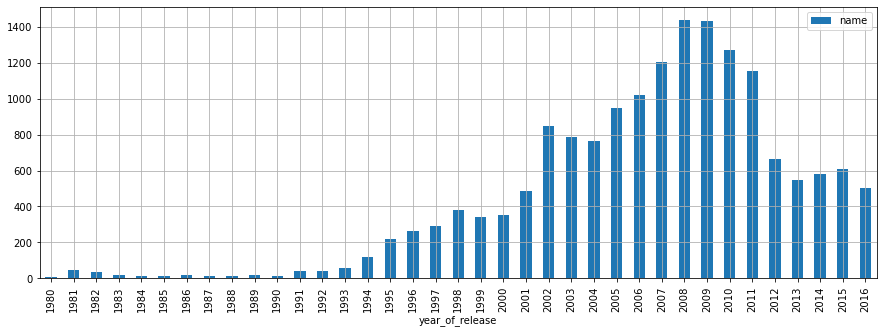

In [14]:
games_group_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_group_year.plot(kind='bar', grid=True, figsize=(15, 5))
plt.show()

Данный график показывает, что количество выпущенных игр начало увеличиваться с 1993 года и достигло своего пика в 2008 году, затем количество выпускаемых игр начало уменьшаться.

Посмотрим на эти же данные для разных платформ.

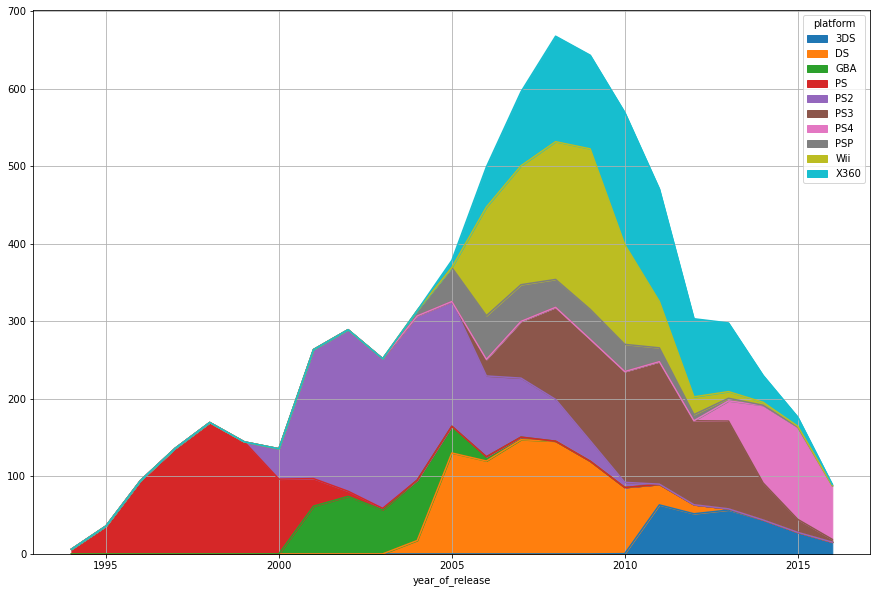

In [15]:
games = games.query('year_of_release >= 1993') # Отбросим данные до 1993 года
games_group_platform = (games                  # Сгрупируем данные по платформам, рассчитаем суммарные продажи
                        .pivot_table(index='platform', values='sum_sales', aggfunc='sum')
                        .sort_values('sum_sales', ascending=False)) # Отсортируем данные по числу продаж
top_platforms = games_group_platform.head(10).index.values.tolist() # Получим список топ-10 платформ по продажам
top_platform_games = games.query('platform in @top_platforms')      # Оставим игры из топ-10 списка платформ

top_platform_games_group_year = top_platform_games.pivot_table(index='year_of_release', # Сгруппируем данные по годам и платформам
                                                               columns='platform',
                                                               values='sum_sales',
                                                               aggfunc='sum'
                                                              )
top_platform_games_group_year.plot(kind='area', grid=True, figsize=(15, 10)) # Построим график по сформированным данным
plt.show()

Данный график показывает, что топовые платформы начали активно выпускать игры с 1993 года. Можно заметить, что в среднем игры для каждой платформы выпускаются в течение 10-ти лет. Своего пика каждая платформа достигает примерно за 5 лет. На примере платформы PS можно заметить, что новая версия платформы выходит примерно через 6-7 лет после выпуска предыдущей версии.

Таким образом, исходя из полученных данных, можно определить, что актуальным является период 5 лет. За такой период можно четко определить, достигла ли пика конкретная платформа, или ещё только идет к нему. Соответственно для прогнозирования данных на 2017 год следует взять период 2012-2016 гг.

Теперь исследуем платформы в актуальном периоде. Сначала определим платформы, лидирующие по продажам. 

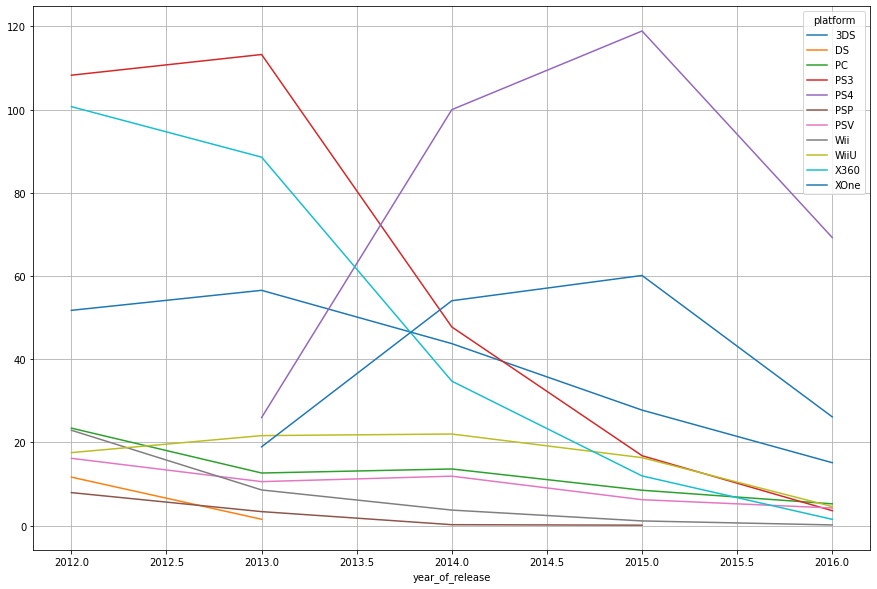

In [16]:
actual_games = games.query('year_of_release >= 2012')      # Оставим игры, вышедшие с 2012 года

actual_games_group_year = actual_games.pivot_table(index='year_of_release', # Сгруппируем данные по годам и платформам
                                                               columns='platform',
                                                               values='sum_sales',
                                                               aggfunc='sum'
                                                              )
actual_games_group_year.plot(kind='line', grid=True, figsize=(15, 10)) # Построим график по сформированным данным
plt.show()

Данный график показывает, что все платформы достигли пика в актуальном периоде. Продажи на одних платформах падают уже давно, на некоторых платформах начали падать в последние 2 года. <br>
Самой прибыльной платформой в актуальном периоде, исходя из графика, является PS4. Менее прибыльными являются PS3 и X360, продажи игр на которых падают с 2012-2013 годов.
Таким образом можно выделить несколько потенциально прибыльных платформ:
1. PS4, продажи по которой лидируют в актуальном периоде, а пик был пройден лишь в 2015 году.
2. XOne, продажи по которой в целом похожи на продажи PS4, только примерно в 2 раза ниже.
3. 3DS, пик по продажам у которой был пройден в 2013 году, но платформа до сих пор сохраняет свой потенциал.

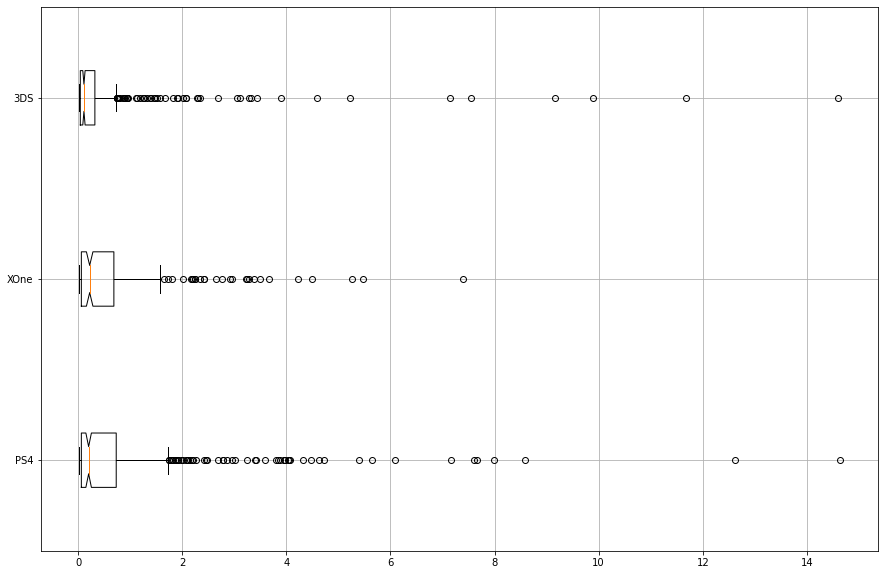

In [17]:
actual_top_platforms = ['PS4', 'XOne', '3DS']  # Выберем потенциальные платформы
actual_top_platform_games = actual_games.query('platform in @actual_top_platforms')  # Сформируем датафрейм из топовых платформ

import warnings
warnings.filterwarnings('ignore') # Отключим предупреждения

plt.figure(figsize=(15,10))
plt.boxplot((actual_top_platform_games.query('platform in @actual_top_platforms[0]')['sum_sales'],
             actual_top_platform_games.query('platform in @actual_top_platforms[1]')['sum_sales'],
             actual_top_platform_games.query('platform in @actual_top_platforms[2]')['sum_sales']),
             labels=actual_top_platforms,
             vert=False,
             notch=True
           )
plt.grid(True)
plt.show()

Представленные графики показывают, что медианное значение продаж для всех платформ меньше, чем 0,5 миллионов долларов. Для платформы PS4 можно считать уникальными выручку больше 2 миллионов долларов за игру. Для платформы XOne выручка больше 1,6 миллиона долларов является уникальной. Для платформы 3DS заработать больше 1 миллиона долларов за игру считается уникальным.

Теперь рассмотрим, как отзывы пользователей и рейтинг критиков влияет на продажи игр топовых платформ. Для этого построим диаграмми рассеяния и посчитаем корреляцию между отзывами и продажами.

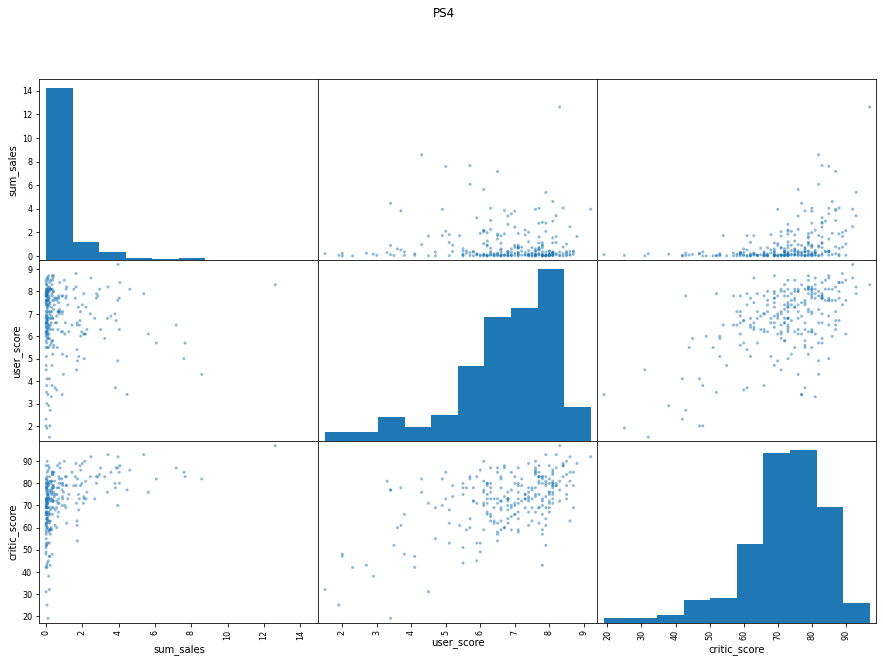

              sum_sales  user_score  critic_score
sum_sales      1.000000   -0.031957      0.406568
user_score    -0.031957    1.000000      0.557654
critic_score   0.406568    0.557654      1.000000


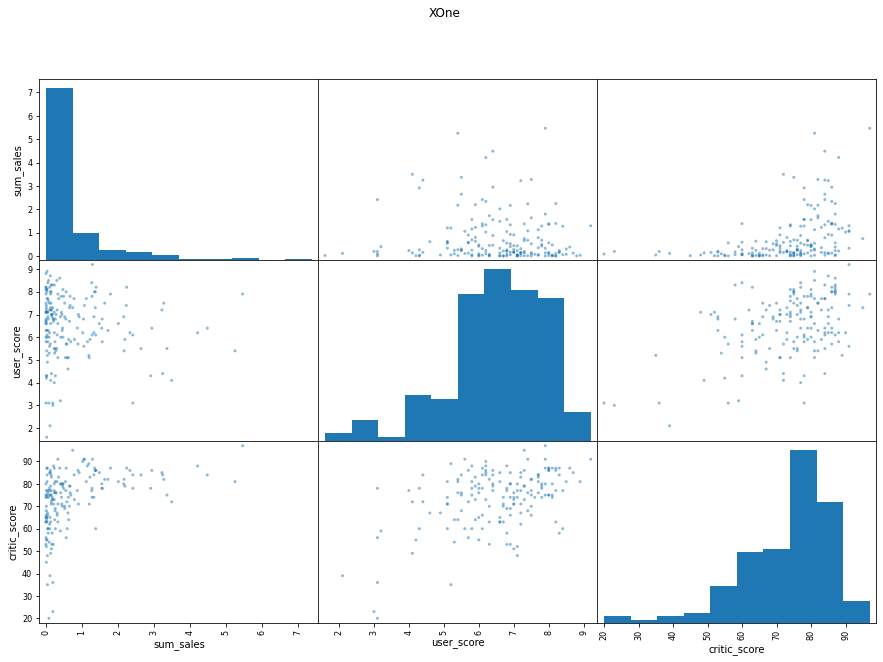

              sum_sales  user_score  critic_score
sum_sales      1.000000   -0.068925      0.416998
user_score    -0.068925    1.000000      0.472462
critic_score   0.416998    0.472462      1.000000


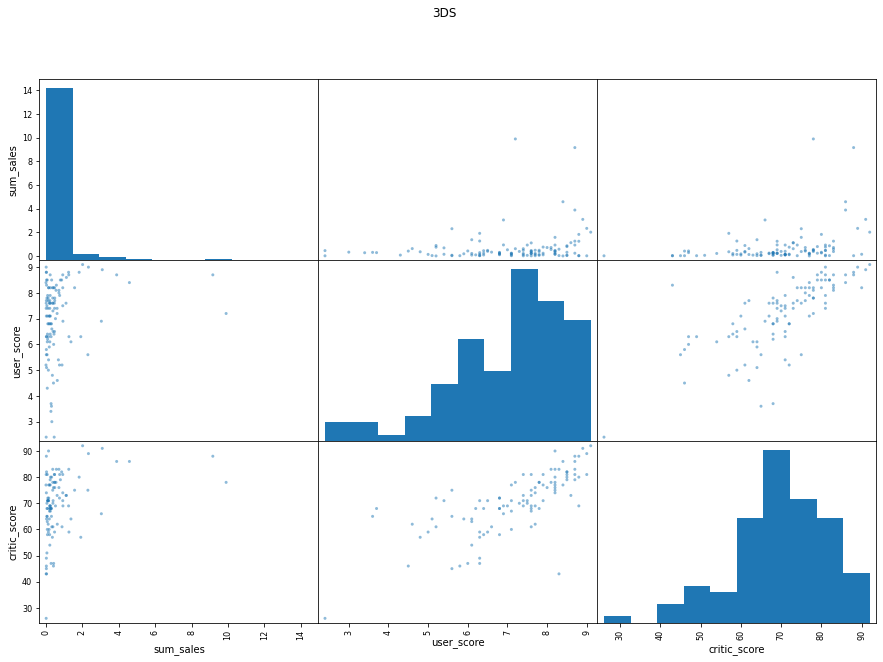

              sum_sales  user_score  critic_score
sum_sales      1.000000    0.198150      0.320458
user_score     0.198150    1.000000      0.721517
critic_score   0.320458    0.721517      1.000000


In [18]:
for element in actual_top_platforms:
    element_games = actual_top_platform_games.query('platform in @element')
    pd.plotting.scatter_matrix(element_games.loc[:, ['sum_sales', 'user_score', 'critic_score']], figsize=(15,10))
    plt.suptitle(element)
    plt.show()
    print(element_games.loc[:, ['sum_sales', 'user_score', 'critic_score']].corr())

Представленные графики, а также коэффициенты корреляции говорят о следующем: оценка пользователей практически не влияет на продажи игр топовых платформ, в то время как рейтинг критиков иногда значительно улучшает продажи игр на всех этих платформах. В целом на каждой платформе оценка критиков выше средней увеличивает продажи игр.

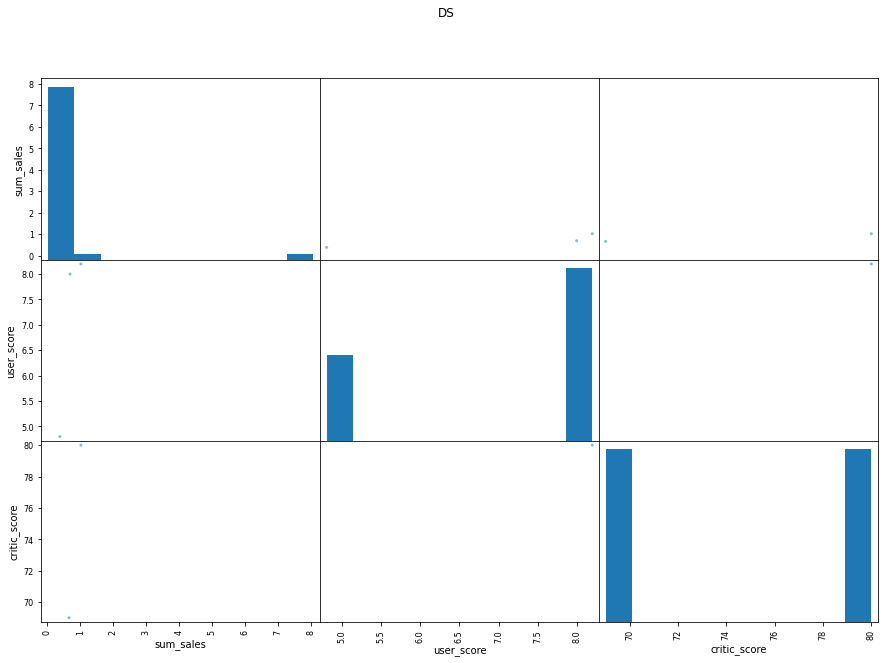

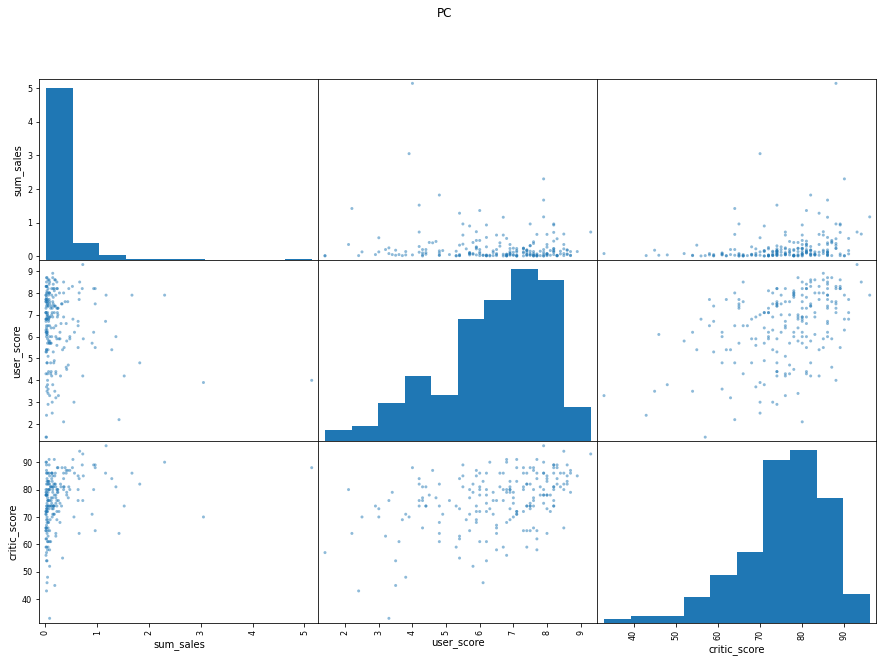

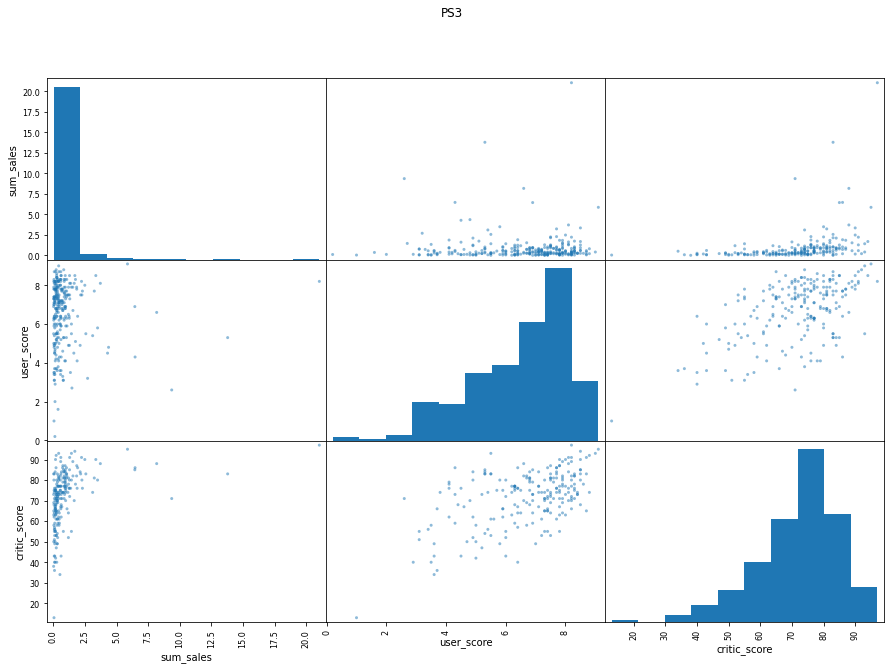

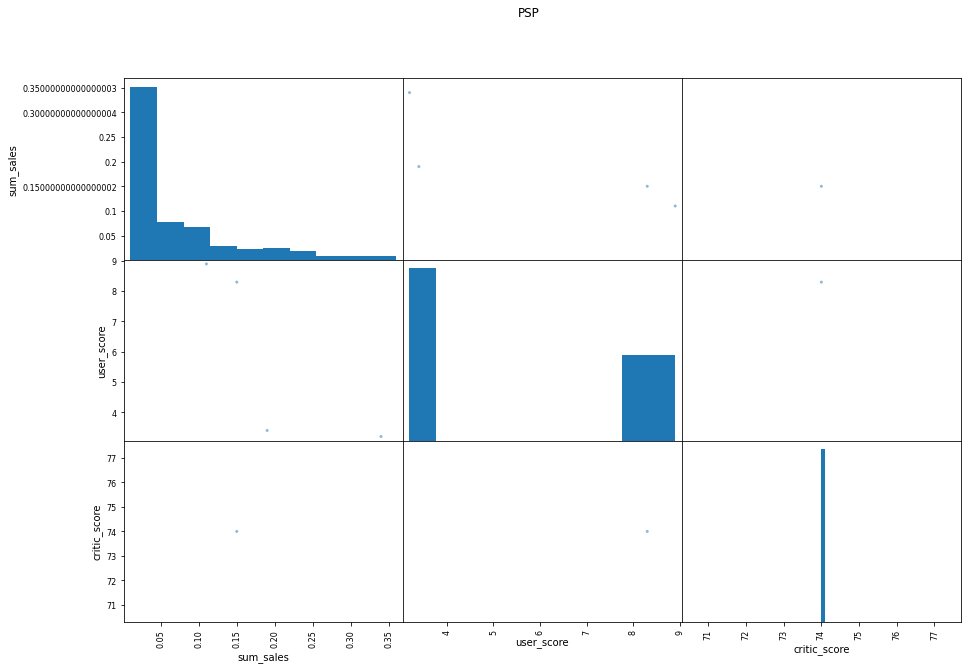

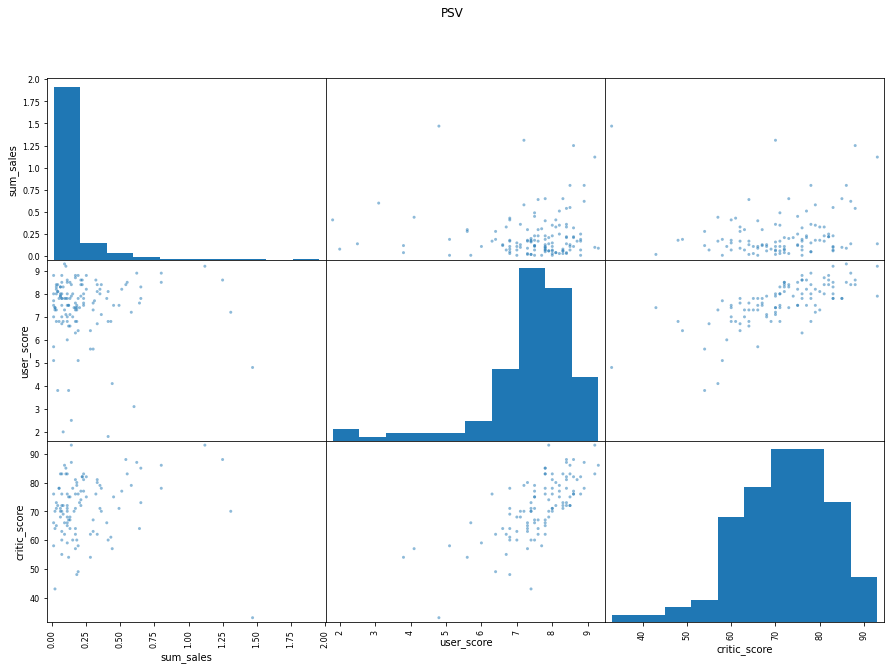

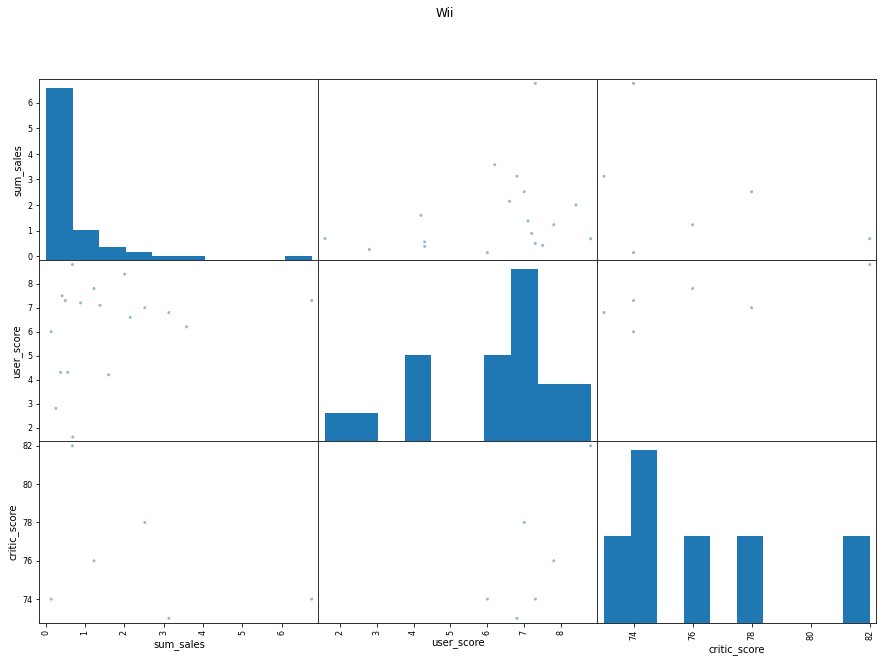

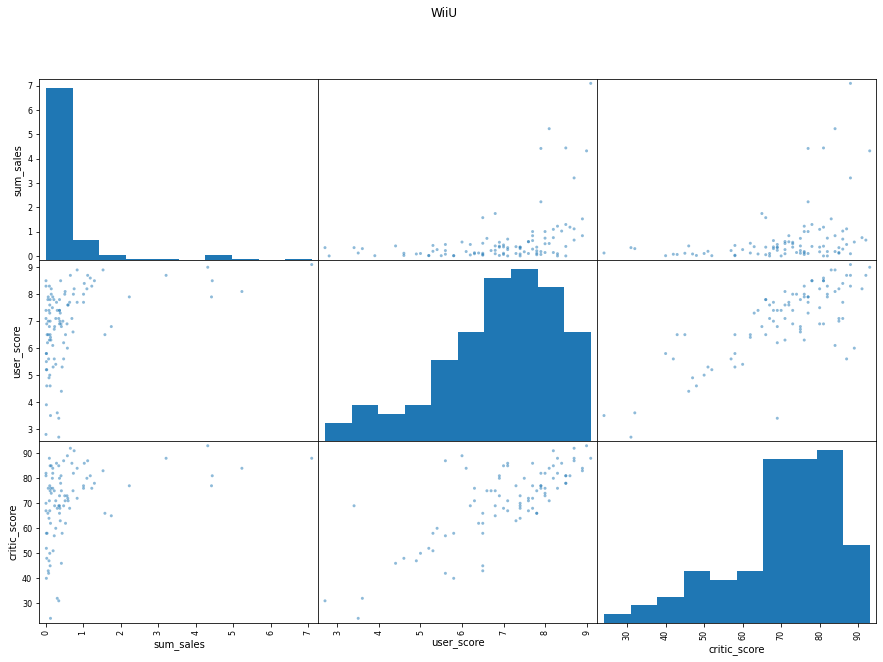

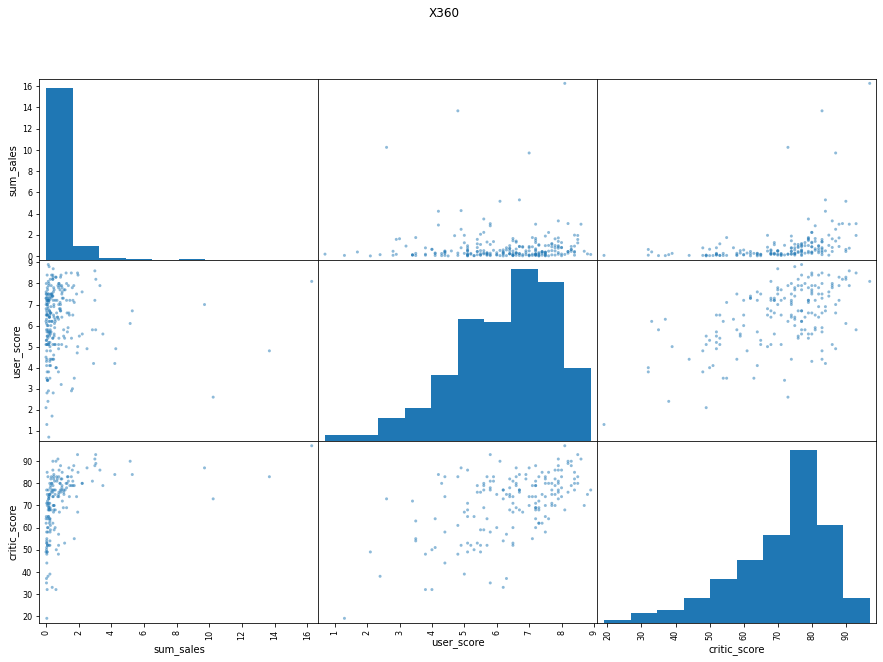

In [19]:
actual_not_top_platforms = ['DS', 'PC', 'PS3', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360']
actual_not_top_platform_games = actual_games.query('platform in @actual_not_top_platforms')  # Сформируем датафрейм из не топовых платформ

for element in actual_not_top_platforms:
    element_games = actual_not_top_platform_games.query('platform in @element')
    pd.plotting.scatter_matrix(element_games.loc[:, ['sum_sales', 'user_score', 'critic_score']], figsize=(15,10))
    plt.suptitle(element)
    plt.show()

Полученные графики для не топовых платформ в целом показывают те же самые зависимости. То есть высокий рейтинг критиков приводит к увеличению продаж игр на платформе.

Теперь изучим распределение игр по жанрам.

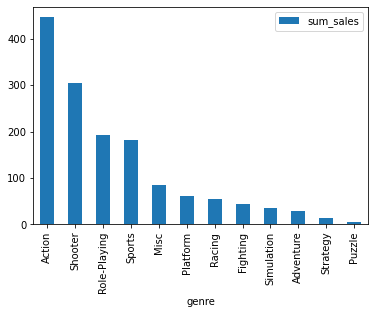

,sum_sales
genre,
Action,446.41
Shooter,304.75
Role-Playing,192.80
Sports,181.07
Misc,85.28
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


In [20]:
actual_games_genre = (actual_games
                      .pivot_table(index='genre', values='sum_sales', aggfunc='sum')
                      .sort_values('sum_sales', ascending=False))
actual_games_genre.plot(kind='bar')
plt.show()
actual_games_genre

Легко заметить, что прибыльность игр сильно зависит от жанра игры. Самым прибыльным в актуальном периоде является жанр Action. Менее популярными являются жанры Shooter, RPG и Sports. Самым провальным, с продажами на 2 порядка меньше, чем у Action, является жанр Puzzle.

### Вывод

Проведя исследовательский анализ данных, мы пришли к выводу, что актуальным периодом для прогнзирования данных на будущий год является период в 5 лет - с 2012 по 2016 год включительно. За это время большинство платформ успевают дойти до пика продаж, а также легко заметить, на каком этапе развития находится платформа. В актуальном периоде были выделены 3 платформы, обладающие наибольшим потенциалом с точки зрения прибыльности - это PS4,  XOne и 3DS. Анализ показателей этих платформ показал, что в среднем прибыль с одной игры составляет порядка 0,5 миллионов долларов, а прибыль больше 1 миллиона доллара являются довольно редкими. Также анализ всех платформ показал, что рейтинг критиков сильно влияет на продажи игр, особенно, если этот рейтинг выше среднего. Если ниже - практически не влияет, также как и не особо влияет оценка пользователей. Анализ жанров игр в актуальном периоде показал, что самыми продаваемыми являются игры жанрок Action, Shooter, RPG и Sports. Самыми убыточными являются игры жанра Puzzle.

### Шаг 4. Портрет пользователя каждого региона

Популярность игр для разных платформ или разных жанров может быть не одинаковой в различных регионах. Проверим это.

Сначала выделим самые популярные платформы в различных регионах.

In [21]:
na_top_actual_platforms = (actual_games
                       .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                       .sort_values('na_sales', ascending=False)
                      )
na_top_actual_platforms.head(5)

,na_sales
platform,
X360,140.57
PS4,108.74
PS3,103.74
XOne,93.12
3DS,55.49


In [22]:
eu_top_actual_platforms = (actual_games
                       .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                       .sort_values('eu_sales', ascending=False)
                      )
eu_top_actual_platforms.head(5)

,eu_sales
platform,
PS4,141.09
PS3,107.27
X360,74.89
XOne,51.59
3DS,42.83


In [23]:
jp_top_actual_platforms = (actual_games
                       .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                       .sort_values('jp_sales', ascending=False)                       
                      )
jp_top_actual_platforms.head(5)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


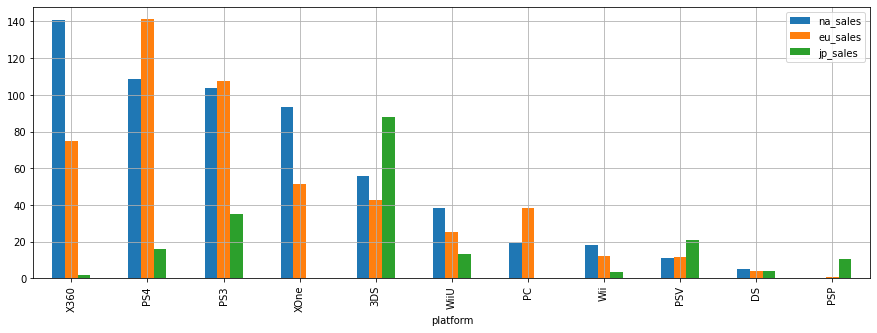

In [24]:
charts = na_top_actual_platforms.join(eu_top_actual_platforms)
charts = charts.join(jp_top_actual_platforms)
charts.plot(kind='bar', grid=True, figsize=(15,5))
plt.show()

Как видно из полученных данных, список популярных платформ дя каждого региона - разный. В регионах na и eu продажи игр в целом выше, чем в регионе jp. Рассмотрим несколько платформ, фигурирующих в списках:
1. PS4 лидирует в регионе eu. В регионе na продажи в 1,3 раза меньше, в регионе jp почти в 10 раз меньше.
2. X360 лидер в регионе na. В регионе eu продажи ниже в 2 раза, а в регионе jp вообще не попала в топ.
3. 3DS - с большим отрывом лидер в регионе jp, в то время как в регионах na и eu эта платформа на последней строчке рейтинга, а число продаж почти в 2 раза меньше, чем в регионе jp.

В целом предпочтение платформы в регионах na и eu похожи, в то время как в регионе jp предпочитают совсем другие платформы.

Теперь сравним предпочтения по жанрам.

In [25]:
na_top_actual_genres = (actual_games
                       .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                       .sort_values('na_sales', ascending=False)
                       .head(5)
                      )
na_top_actual_genres

,na_sales
genre,
Action,180.15
Shooter,144.79
Sports,81.53
Role-Playing,64.00
Misc,38.19


In [26]:
eu_top_actual_genres = (actual_games
                       .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                       .sort_values('eu_sales', ascending=False)
                       .head(5)
                      )
eu_top_actual_genres

,eu_sales
genre,
Action,161.70
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


In [27]:
jp_top_actual_genres = (actual_games
                       .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                       .sort_values('jp_sales', ascending=False)
                       .head(5)
                      )
jp_top_actual_genres

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,13.10
Simulation,10.41
Fighting,9.44


И опять оказалось, что предпочтения пользователей из регионов na и eu совпадают, в то время как пользователи из региона jp предпочитают совсем другие жанры. Топ жанров регионов na и eu полностью совпадают, лишь незначительно отличаются продажи разных жанров. Самый популярный жанр из этих двух регионов - Action, находится на втором месте в топе региона jp с количеством продаж в 3 раза меньше. Жанр RPG находится в топе всех регионов с примерно одинаковым количеством продаж.

Теперь проверим, влияет ли рейтинг ESRB на продажи в каждом регионе.

In [28]:
esrb_actual_games = (actual_games
                     .pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
                     .sort_values('na_sales', ascending=False)
                    )
esrb_actual_games

,eu_sales,jp_sales,na_sales
rating,,,
M,194.44,21.20,231.67
E,113.03,28.33,114.37
RP,91.50,109.08,103.31
E10+,57.25,8.19,77.93
T,52.96,26.02,66.02


Данная таблица показывает, что рейтинг в регионах eu и na одинаково влияет на продажи игр. Самыми продаваемыми являются игры с рейтингом M и E. Менее продаваемыми являются игры без рейтинга. Наименее продаваемыми игры с рейтингом E10+ и T. В регионе jp Продаются в основном только игры без рейтинга. Игры с любым рейтингом продаются одинаково плохо. 

### Вывод

На основе полученных данных можно заметить, что поведение игроков региона eu и na очень похожи: в обоих регионах предпочитают одни и те же платформы, одни и те же жанры, рейтинг игры одинаково влияет на продажи. Регион jp сильно отличается. Там предпочитают совсем другие жанры и платформы, а покупают игры в основном без рейтинга ESRB.

### Шаг 5. Проверка гипотез

Исследуем следующие два предположения:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезу для первого предположения:<br>
H0: средние пользовательские рейтинги платформы Xbox One не отличаются от средних пользовательских рейтингов платформы PC.<br>
H1: средние пользовательские рейтинги платформы Xbox One отличаются от средних пользовательских рейтингов платформы PC.

Для проверки нулевой гипотезы сначала проверим распределение рейтингов по двум платформам.

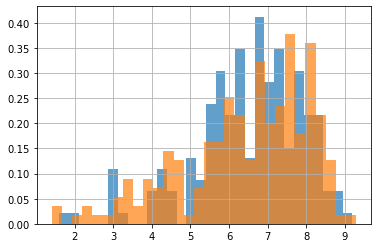

Нулевая гипотеза: распределение оценок по платформе XOne - нормальное
Отвергаем нулевую гипотезу, p-value=0.00115%
Нулевая гипотеза: распределение оценок по платформе PC - нормальное
Отвергаем нулевую гипотезу, p-value=0.00475%


In [29]:
xone_actual_user_score = actual_games.query('platform in "XOne" and user_score >= 0')['user_score'] # Получим пользовательские рейтинги платформы XOne в актуальном периоде
pc_actual_user_score = actual_games.query('platform in "PC" and user_score >= 0')['user_score']     # Получим пользовательские рейтинги платформы PC в актуальном периоде

# Построим гистограммы
xone_actual_user_score.hist(bins=30, density=True, alpha=0.7)
pc_actual_user_score.hist(bins=30, density=True, alpha=0.7)
plt.show()

alpha = .05 # Зададимся уровнем статистической значимости - 5%

def hyptest(p_value, alpha): # Опишем функцию для сравнения p_value с уровнем статистической значимости
    if p_value > alpha:
        print('Не отвергаем нулевую гипотезу, p-value={:.5%}'.format(p_value))
    else:
        print('Отвергаем нулевую гипотезу, p-value={:.5%}'.format(p_value))

# Проверим распределения на нормальность
print('Нулевая гипотеза: распределение оценок по платформе XOne - нормальное')
hyptest(st.normaltest(xone_actual_user_score).pvalue, alpha)
print('Нулевая гипотеза: распределение оценок по платформе PC - нормальное')
hyptest(st.normaltest(pc_actual_user_score).pvalue, alpha)

Оба распределения оказались не нормальными. Исследуемые данные являются количественными. Обе выборки являются независимыми. Поэтому для проверки нулевой гипотезы воспользуемся критерием Манна-Уитни.

In [30]:
print('Нулевая гипотеза: средние пользовательские рейтинги платформы Xbox One не отличаются от средних пользовательских рейтингов платформы PC')
hyptest(st.mannwhitneyu(xone_actual_user_score, pc_actual_user_score).pvalue, alpha)

Нулевая гипотеза: средние пользовательские рейтинги платформы Xbox One не отличаются от средних пользовательских рейтингов платформы PC
Не отвергаем нулевую гипотезу, p-value=39.96179%


Таким образом нулевая гипотеза не отвергнута, дейтсивтельно средние пользовательские ретинги платформы Xbox One и PC не отличаются.

Теперь проверим второе предположение. Сформулируем нулевую и альтернативную гипотезы.<br>
H0: средние пользовательские рейтинги игр жанров Action не отличаются от средних пользовательский рейтингов игр жанров Sports.
H1: средние пользовательские рейтинги игр жанров Action отличаются от средних пользовательский рейтингов игр жанров Sports.

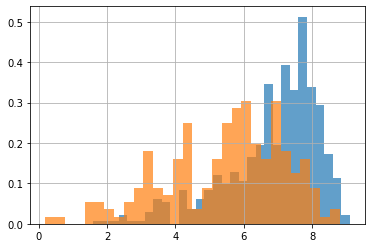

Нулевая гипотеза: распределение оценок по жанру Action - нормальное
Отвергаем нулевую гипотезу, p-value=0.00000%
Нулевая гипотеза: распределение оценок по жанру Sports - нормальное
Отвергаем нулевую гипотезу, p-value=0.71652%


In [31]:
action_actual_user_score = actual_games.query('genre in "Action" and user_score >= 0')['user_score'] # Получим пользовательские рейтинги платформы XOne в актуальном периоде
sports_actual_user_score = actual_games.query('genre in "Sports" and user_score >= 0')['user_score'] # Получим пользовательские рейтинги платформы PC в актуальном периоде

# Построим гистограммы
action_actual_user_score.hist(bins=30, density=True, alpha=0.7)
sports_actual_user_score.hist(bins=30, density=True, alpha=0.7)
plt.show()

# Проверим распределения на нормальность
print('Нулевая гипотеза: распределение оценок по жанру Action - нормальное')
hyptest(st.normaltest(action_actual_user_score).pvalue, alpha)
print('Нулевая гипотеза: распределение оценок по жанру Sports - нормальное')
hyptest(st.normaltest(sports_actual_user_score).pvalue, alpha)

Оба распределения оказались не нормальными. Исследуемые данные являются количественными. Обе выборки являются независимыми. Поэтому для проверки нулевой гипотезы воспользуемся критерием Манна-Уитни.

In [32]:
print('Нулевая гипотеза: средние пользовательские рейтинги игр жанров Action не отличаются от средних пользовательский рейтингов игр жанров Sports')
hyptest(st.mannwhitneyu(action_actual_user_score, sports_actual_user_score).pvalue, alpha)

Нулевая гипотеза: средние пользовательские рейтинги игр жанров Action не отличаются от средних пользовательский рейтингов игр жанров Sports
Отвергаем нулевую гипотезу, p-value=0.00000%


Таким образом нулевая гипотеза отвергнута, то есть верно предположение, что средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод

В данном разделе мы проверили два предположения:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.<br>

Оба предположения не опровегнуты стаистическими тестами.

### Общий вывод



В ходе работы были получены следующие результаты:
1. Исходные данные были предобработаны: названия столбцов приведены к нижнему регистру, изменены типы данных столбцов, обработаны пропуски, которые можно обработать;
2. Исследовательский анализ данных показал, что актуальным периодом является период в 5 лет, который позволяет спрогнозировать продажи игр на будущий год, т.к. примерно за это время большинство платформ доходят до пика продаж, а значит на основе последних пяти лет можно судить о состоянии платформы.
3. В актуальном периоде были выбраны 3 потенциально прибыльных платформы: PS4, XOne и 3DS. Для этих платформ были проанализированы продажи. Было выдвинуто предположение, что рейтинг критиков сильно влияет на продажи игр, особенно если этот рейтинг выше среднего. Также был получен список наиболее прибыльных жанров: Action, Shooter, RPG и Sports, а также наиболее убыточный жанр - Puzzle.
4. Далее был составлен портрет пользователей из различных регионов. Пользователи из регионов eu и na очень похожи: они предпочитают одни и те же жанры, и одни и те же платформы. При этом пользователи из региона jp предпочитают совсем другие жанры и платформы. Также была выявлена зависимость от рейтинга esrb и продаж игр. В регионе jp предпочитают игры без рейтинга, в то время как в других регионах в основном покупают игры с рейтингом E и M.
5. И наконец были проверены два предположения: средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action и Sports разные. Оба предположения не опровегнуты статистическими тестами.

Таким образом исследовательский и статистический анализы данных показали возможность спрогнозировать продажи игр для определенных платформ и определенных жанров. 